# AirBnB San Francisco Room Price Project
#### Capstone 2 - Hallie McConlogue

# Problem Statement Worksheet (My Hypothesis)
The business problem I am investigating is what rate I can charge on AirBnB for rooms in my family’s home in San Francisco in the next year.

#### Focus
For this solution I will focus on comparing features of the rooms I have to those being rented in San Francisco on AirBnB in order to get a good estimate for what I should charge per room.


#### Data sources
General market research:
https://www.statista.com/statistics/206546/us-hotels-occupancy-rate-by-month/

##### AirBnB data 
Description:
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896
http://insideairbnb.com/get-the-data.html

SF listings:
http://data.insideairbnb.com/united-states/ca/san-francisco/2021-04-07/visualisations/listings.csv


#### How I will solve the AirBnB problem in brief:
Clean the data.

Look at scatter plots of features and reviews vs room price.

Build a heat map that shows what columns most affect room price.

Normalize significant column values with each other.

Run machine analysis to find appropriate market value for my rooms.


## Data wrangling goals:

#### Data Collection Time estimate: 1-2 hours
■ Data loading -done

■ Data joining - first pass done

■ Import pandas library, for read_csv() -done

■ try merge, join, or concatenate. -first pass done

#### Data Organization - Time estimate: 1-2 hours
■ File structure - done

■ GitHub - done

■ Hint: the glob library could come in handy here…  Should I use this here Ben?

■ Why GitHub again? Done: portfolio comits to bring you back to pre mistake co work with mentor?  other students?

#### Data Definition - understanding of your data - Time estimate: 1-2 hours
■ Description of the columns good look close at them - done

■ Counts and percents unique values -  done

■ Names accurate - done

■ Data types of your columns right - done? ... mostly

■ Statistics for columns, 
    - mean, 
    - median, 
    - mode, 
    - standard deviation, 
    - range, and
    - number of unique values. 

■ Conclusions?

■ investigate further?

### Data Cleaning - Time estimate: 1-2 hours
■ NA or missing values - done

■ Duplicates ... 

#### Use these:
■ loc[] - filter your data by label

■ iloc[] - filter your data by indexes -- doesn't apply

■ apply() - execute a function across an axis of a DataFrame

■ drop() - drop columns from a DataFrame - done

■ is_unique() - check if a column is a unique identifier

■ Series methods:
    - str.contains(), which can be used to check if a certain substring occurs in a string of a Series, and 
    - str.extract(), which can be used to extract capture groups with a certain regex (or regular expression) pattern

■ numPy methods like 
    - .where(), to clean columns. Recall that such methods have the structure: np.where(condition, then, else)


■ DataFrame methods to check for null values, such as  - done
    - df.isnull().values.any()
    
    
outliers 
bad data
missing data venture into eda
clean data frame


### Importing packages needed to complete project:

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plot
import datetime

### Loading files

In [2]:
# the supplied CSV data file is the raw_data directory
listings_data = pd.read_csv('../raw_data/listings.csv')
description = pd.read_csv('../raw_data/AirBnB_Col_Desc.csv')


### Column Descriptions

In [3]:
description.style.set_properties(**{'text-align': 'left'})



,Column,Description
0,host_id,Airbnb's unique identifier for the host/user
1,host_url,The Airbnb page for the host
2,host_name,Name of the host. Usually just the first name(s).
3,host_since,The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.
4,host_location,The host's self reported location
5,host_about,Description about the host
6,host_response_time,response time is the average amount of time that it took for you to respond to all new messages in the past 30 days
7,host_response_rate,Percentage of new inquiries and reservation requests the host responded to (by either accepting/pre-approving or declining) within 24 hours in the past 30 days.
8,host_acceptance_rate,That rate at which a host accepts booking requests.
9,host_is_superhost,nan


### Identifying key column and features of interest
Price is the value we find correlations on.


### Data Types

In [4]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6682 non-null   int64  
 1   listing_url                                   6682 non-null   object 
 2   scrape_id                                     6682 non-null   int64  
 3   last_scraped                                  6682 non-null   object 
 4   name                                          6682 non-null   object 
 5   description                                   6609 non-null   object 
 6   neighborhood_overview                         4777 non-null   object 
 7   picture_url                                   6682 non-null   object 
 8   host_id                                       6682 non-null   int64  
 9   host_url                                      6682 non-null   o

### checking out the data quality

In [5]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20210407173733,2021-04-10,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,10.0,10.0,10.0,STR-0001256,f,1,1,0,0,1.94
1,5858,https://www.airbnb.com/rooms/5858,20210407173733,2021-04-08,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.76
2,7918,https://www.airbnb.com/rooms/7918,20210407173733,2021-04-08,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,9.0,9.0,8.0,NaN,f,8,0,8,0,0.13
3,8142,https://www.airbnb.com/rooms/8142,20210407173733,2021-04-08,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,10.0,9.0,9.0,NaN,f,8,0,8,0,0.10
4,8339,https://www.airbnb.com/rooms/8339,20210407173733,2021-04-07,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,10.0,10.0,10.0,STR-0000264,f,2,2,0,0,0.20


### cleaning the data 

### looking for missing data

In [6]:
missing = pd.concat([listings_data.isnull().sum(), 100 * listings_data.isnull().mean()], axis=1)
missing.columns=['count', '% missing']

missing_sorted = missing.sort_values(by='count', ascending=False)
print('missing_sorted:',type(missing_sorted))

missing_sorted.style.set_properties(**{'text-align': 'left'})


missing_sorted: <class 'pandas.core.frame.DataFrame'>


,count,% missing
neighbourhood_group_cleansed,6682,100.000000
calendar_updated,6682,100.000000
bathrooms,6682,100.000000
license,2954,44.208321
host_about,2161,32.340617
neighbourhood,1905,28.509428
neighborhood_overview,1905,28.509428
host_response_rate,1805,27.012870
host_response_time,1805,27.012870
review_scores_value,1736,25.980245


## filling in missing data and converting types to numeric values by column

### neighbourhood, neighbourhood_group_cleansed, calendar_updated, bathrooms
No real info here, I will drop these columns.

In [7]:
listings_data['neighbourhood'].value_counts()

San Francisco, California, United States                  4770
Daly City, California, United States                         2
San Jose, California, United States                          1
San Francisco , Ca, United States                            1
San Franscisco, California, United States                    1
Noe Valley - San Francisco, California, United States        1
San Francisco, Hayes Valley, California, United States       1
Name: neighbourhood, dtype: int64

In [8]:
listings_data = listings_data.drop(['neighbourhood_group_cleansed','calendar_updated','bathrooms'], axis=1)
listings_data = listings_data.drop(['neighbourhood'], axis=1)

### license
converting to a boolean value if you have a licence does it increase value?

In [9]:
#listings_data['license'].value_counts().head(60)

In [10]:
listings_data['license'] = listings_data['license'].isnull() == False
listings_data['license'].value_counts()

True     3728
False    2954
Name: license, dtype: int64

### host_about 
Putting it empty space when this is not filled in

In [11]:
listings_data['host_about']= listings_data['host_about'].fillna("")
listings_data['neighborhood_overview']= listings_data['neighborhood_overview'].fillna("")

## Host Response change this leave it NA
### host_response_rate Does this indicate weather or not the room was rented? 
I compared this to reviews and analysed the airbnb system and how it works.  I looked up the definition more closely.

##### conclusion:  
The host response N/A relates more to when the listing is available for later but not now (possibly covid)  Or Just listed recently... if it were listed but not responded to at all there would be a bad mark on the listing instead of N/A ... I think.  Also there has been a move to 30 day rentals which would reduce the need for responses withing a 30 day limit of the response rate.

There is good value numeric data here but a lot is missing.  After looking closely filling in an average would be best here. It seems these are the listings that were not sold in that month.  Listings may or may not have been ignored or unused, or somehow the data for these fields just didn't make it in for this time period.

In [12]:
listings_data['host_response_rate'].isna().sum()

1805

In [13]:
listings_data['host_response_rate']=listings_data['host_response_rate'].str.replace('%','')

In [14]:
listings_data['host_response_rate'] = pd.to_numeric(listings_data['host_response_rate'])
#listings_data['host_response_rate'].value_counts()

##### Splitting off the more active listings into Host_responded

In [15]:
Host_responded = listings_data.dropna(axis=0, subset=['host_response_rate'])

In [16]:
#Host_responded['host_response_rate'].isna().sum()
Host_responded['host_response_time'].isna().sum()

0

##### Averaging response and ratings to fill missing data into filled_avg

In [17]:
responseMeanAll = listings_data['host_response_rate'].mean()

In [18]:
filled_avg = listings_data

In [19]:
filled_avg['host_response_rate'] = listings_data['host_response_rate'].fillna(responseMeanAll)

#### Filling in average of host response time:

In [20]:
filled_avg['host_response_time'].value_counts()

within an hour        2991
within a few hours    1054
within a day           677
a few days or more     155
Name: host_response_time, dtype: int64

In [21]:
filled_avg['host_response_time'] = filled_avg['host_response_time'].str.replace('within an hour','1')
filled_avg['host_response_time'] = filled_avg['host_response_time'].str.replace('within a few hours','2')
filled_avg['host_response_time'] = filled_avg['host_response_time'].str.replace('within a day','3')
filled_avg['host_response_time'] = filled_avg['host_response_time'].str.replace('a few days or more','4')

In [22]:
filled_avg['host_response_time'] = pd.to_numeric(filled_avg['host_response_time'])

In [23]:
RTimeAv = filled_avg['host_response_time'].mean()

In [24]:
filled_avg['host_response_time'] = filled_avg['host_response_time'].fillna(RTimeAv)

#### host_acceptance_rate

In [25]:

filled_avg['host_acceptance_rate'].value_counts()

100%    1712
99%      311
98%      297
0%       208
50%      202
        ... 
10%        1
7%         1
22%        1
37%        1
13%        1
Name: host_acceptance_rate, Length: 88, dtype: int64

In [26]:
filled_avg['host_acceptance_rate']=filled_avg['host_acceptance_rate'].str.replace('%','')
filled_avg['host_acceptance_rate'] = pd.to_numeric(filled_avg['host_acceptance_rate'])
AcceptAv = filled_avg['host_acceptance_rate'].mean()
filled_avg['host_acceptance_rate'] = filled_avg['host_acceptance_rate'].fillna(AcceptAv)

### Filling in reviews with average Change - > leave na
I'm assuming that some people are just too time stressed to give a review.  Also a lot of these will have no review because it has not yet been rented or the rental time is far in the future.
#### review_scores

In [27]:

#filled_avg['review_scores_rating'] = pd.to_numeric(filled_avg['review_scores_rating'])

reviewAvg = filled_avg['review_scores_rating'].mean()
filled_avg['review_scores_rating'] = filled_avg['review_scores_rating'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_value'].mean()
filled_avg['review_scores_value'] = filled_avg['review_scores_value'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_checkin'].mean()
filled_avg['review_scores_checkin'] = filled_avg['review_scores_checkin'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_location'].mean()
filled_avg['review_scores_location'] = filled_avg['review_scores_location'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_cleanliness'].mean()
filled_avg['review_scores_cleanliness'] = filled_avg['review_scores_cleanliness'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_accuracy'].mean()
filled_avg['review_scores_accuracy'] = filled_avg['review_scores_accuracy'].fillna(reviewAvg)

reviewAvg = filled_avg['review_scores_communication'].mean()
filled_avg['review_scores_communication'] = filled_avg['review_scores_communication'].fillna(reviewAvg)

#### Reveiws per month

In [28]:
reviewAvg = filled_avg['reviews_per_month'].mean()
filled_avg['reviews_per_month'] = filled_avg['reviews_per_month'].fillna(reviewAvg)

#### Reveiw Dates

In [29]:
#first_review
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

filled_avg['first_review'] = pd.to_datetime(filled_avg['first_review'])
filled_avg['first_review'] = filled_avg['first_review'].fillna(tomorrow)

#last_review
#filled_avg['last_review'] = filled_avg['last_review'].astype('datetime64[ns]')
filled_avg['last_review'] = pd.to_datetime(filled_avg['last_review'])
filled_avg['last_review'] = filled_avg['last_review'].fillna(tomorrow)
#filled_avg['last_review'].value_counts()
#type(filled_avg['last_review'][0])

### Bedrooms

In [30]:
#type(filled_avg['bedrooms'][0])
BedroomAvg = filled_avg['bedrooms'].mean()
filled_avg['bedrooms'] = filled_avg['bedrooms'].fillna(BedroomAvg)
filled_avg['bedrooms'].value_counts()

1.000000    3878
2.000000    1217
1.497414     882
3.000000     521
4.000000     139
5.000000      28
6.000000      10
8.000000       3
7.000000       3
9.000000       1
Name: bedrooms, dtype: int64

### host_neighbourhood

In [31]:
filled_avg['host_neighbourhood']= filled_avg['host_neighbourhood'].fillna("")
filled_avg['host_location']= filled_avg['host_location'].fillna("")
#filled_avg['host_location'].value_counts()

### host_listings_count
fill with one

In [32]:
filled_avg['host_listings_count']= filled_avg['host_listings_count'].fillna(1)
#host_total_listings_count
filled_avg['host_total_listings_count']= filled_avg['host_total_listings_count'].fillna(1)

### host_identity_verified

In [33]:
filled_avg['host_identity_verified']= filled_avg['host_identity_verified'].fillna(False)
filled_avg['host_name']= filled_avg['host_name'].fillna("")
filled_avg['host_is_superhost']= filled_avg['host_is_superhost'].fillna(False)
filled_avg['host_since']= filled_avg['host_since'].fillna("")

### host_has_profile_pic

In [34]:
filled_avg['host_has_profile_pic']= filled_avg['host_has_profile_pic'].fillna(False)
filled_avg['host_picture_url']= filled_avg['host_picture_url'].fillna("")
filled_avg['host_thumbnail_url']= filled_avg['host_thumbnail_url'].fillna("")
filled_avg['description']= filled_avg['description'].fillna("")


#### saved ideas

In [35]:
#listings_data['last_review'].sort_values(ascending=True).head(60)
#listings_data['last_review', 'host_response_rate'].sort_values(by="last_review",ascending=True)

#missingRev = listings_data[['last_review','host_response_rate','review_scores_value','host_acceptance_rate','host_since']]
#missingRev = missingRev.sort_values(by='host_since', ascending=False)
#print('missingRev:',type(missingRev))
#missingRev.style.set_properties(**{'text-align': 'left'})


#tdf = listings_data.loc[listings_data['bedrooms'].isna()]
#noBedroom = listings_data.loc[listings_data['bedrooms'].isna()]
#noBedroom[['bedrooms', 'room_type']].value_counts('room_type')

#nbrea = noBedroom[noBedroom['room_type'] == 'Entire home/apt']

#nbrea[['room_type','property_type', 'bedrooms', 'beds', 'accommodates','review_scores_value']].sort_values('beds').head(60)

### Beds

In [36]:
#peeking into data
#beds = filled_avg[filled_avg['beds'].isnull()]
#beds[['name','price','review_scores_rating', 'room_type']]
AvBed = filled_avg['beds'].mean()
filled_avg['beds']= filled_avg['beds'].fillna(AvBed)
filled_avg['bathrooms_text']= filled_avg['bathrooms_text'].fillna("")
filled_avg = filled_avg.dropna(axis=0, subset=['minimum_nights_avg_ntm'])

## No more missing data all filled in:

In [37]:
missing2 = pd.concat([filled_avg.isnull().sum(), 100 * filled_avg.isnull().mean()], axis=1)
missing2.columns=['count', '% missing']

missing_sorted2 = missing2.sort_values(by='count', ascending=False)
print('missing_sorted2:',type(missing_sorted))

missing_sorted2.style.set_properties(**{'text-align': 'left'})

missing_sorted2: <class 'pandas.core.frame.DataFrame'>


,count,% missing
id,0,0.000000
maximum_nights_avg_ntm,0,0.000000
calendar_last_scraped,0,0.000000
availability_365,0,0.000000
availability_90,0,0.000000
availability_60,0,0.000000
availability_30,0,0.000000
has_availability,0,0.000000
minimum_nights_avg_ntm,0,0.000000
number_of_reviews_ltm,0,0.000000


# looking at my nieghborhood

In [38]:
filled_avg[filled_avg['host_neighbourhood']=='Bernal Heights'].head(60)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
22,29373,https://www.airbnb.com/rooms/29373,20210407173733,2021-04-08,Sunny house with garden,Our house is a two story building with yard on...,I love its friendly atmosphere and the many ea...,https://a0.muscache.com/pictures/a0ba2f89-c3c5...,126263,https://www.airbnb.com/users/show/126263,...,10.000000,9.000000,10.000000,True,f,2,1,1,0,0.140000
24,32414,https://www.airbnb.com/rooms/32414,20210407173733,2021-04-08,"Cozy, Sunny and Private Space",Conveniently located on Cortland Avenue - the ...,Bernal Heights is a wonderful neighborhood ful...,https://a0.muscache.com/pictures/693795/b4a6ff...,140251,https://www.airbnb.com/users/show/140251,...,10.000000,9.000000,9.000000,True,f,1,1,0,0,0.720000
27,39418,https://www.airbnb.com/rooms/39418,20210407173733,2021-04-08,"Comfortable Home Base, Bernal Heights","Bernal is following safe opening guidelines, u...",This is uniquely positioned on western slope o...,https://a0.muscache.com/pictures/33eff7d3-84ae...,169184,https://www.airbnb.com/users/show/169184,...,10.000000,10.000000,9.000000,False,f,2,2,0,0,0.190000
38,53280,https://www.airbnb.com/rooms/53280,20210407173733,2021-04-08,Large & sunny room with bath + yard,"Spacious, private and quiet room with: kitchen...",It is a friendly and homey neighborhood. Lots ...,https://a0.muscache.com/pictures/e8c64cd3-4364...,126263,https://www.airbnb.com/users/show/126263,...,10.000000,10.000000,10.000000,True,f,2,1,1,0,1.140000
45,57561,https://www.airbnb.com/rooms/57561,20210407173733,2021-04-08,"Bernal Heights Apartment, Patio + Parking",Private luxury apartment (one bedroom) in the ...,"See guide at,<br /><br />(URL HIDDEN)",https://a0.muscache.com/pictures/2d15b761-4c46...,272890,https://www.airbnb.com/users/show/272890,...,9.000000,9.000000,9.000000,True,f,1,1,0,0,1.720000
64,71645,https://www.airbnb.com/rooms/71645,20210407173733,2021-04-08,Northslope Studio in Bernal Heights with a Zen...,Wake up to the soothing green view from this f...,"Bernal Heights is an intimate, village-like co...",https://a0.muscache.com/pictures/monet/Select-...,367464,https://www.airbnb.com/users/show/367464,...,10.000000,9.000000,9.000000,True,f,1,1,0,0,2.590000
94,132441,https://www.airbnb.com/rooms/132441,20210407173733,2021-04-08,"Calm, Cool & Collected on Sunny Bernal Hill",Come to celebrate! Come to explore! Come to r...,"Here in Bernal Heights, the vibrant buzz of Mi...",https://a0.muscache.com/pictures/924375/0876b8...,650862,https://www.airbnb.com/users/show/650862,...,10.000000,10.000000,10.000000,True,f,1,0,1,0,1.120000
118,199480,https://www.airbnb.com/rooms/199480,20210407173733,2021-04-08,One room overlooking Precita Park,<b>The space</b><br />Room in Victorian flat o...,,https://a0.muscache.com/pictures/1936510/3f888...,974441,https://www.airbnb.com/users/show/974441,...,10.000000,10.000000,10.000000,True,t,2,0,2,0,1.730000
132,229319,https://www.airbnb.com/rooms/229319,20210407173733,2021-04-08,Bernal pied-à-terre,<b>The space</b><br />This eclectic pied-a-ter...,,https://a0.muscache.com/pictures/32812571/f115...,12798954,https://www.airbnb.com/users/show/12798954,...,10.000000,9.000000,9.000000,False,f,2,2,0,0,0.160000
140,258786,https://www.airbnb.com/rooms/258786,20210407173733,2021-04-07,Room with Bay Views,This is the top floor room of my home in Lovel...,,https://a0.muscache.com/pictures/1ff0fde8-ab6c...,698337,https://www.airbnb.com/users/show/698337,...,10.000000,9.000000,9.000000,True,f,2,1,1,0,0.140000


### Looking at price vs location rating

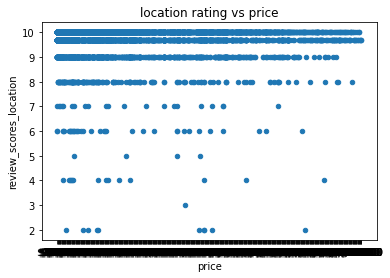

In [39]:
filled_avg.plot.scatter(x='price', y='review_scores_location', title= "location rating vs price");

plot.show(block=True);

### neighborhood counts found a cleansed neighbourhood column

In [40]:
ldf = filled_avg['neighbourhood_cleansed'].value_counts()
hoodDF = ldf.to_frame()
hoodDF.style.set_properties(**{'text-align': 'left'})

,neighbourhood_cleansed
Downtown/Civic Center,725
Mission,592
South of Market,518
Western Addition,462
Haight Ashbury,333
Castro/Upper Market,311
Bernal Heights,298
Nob Hill,285
Noe Valley,258
Outer Sunset,253


In [41]:
messyHood = filled_avg['host_neighbourhood'].value_counts()
hoodMessDF = messyHood.to_frame()
hoodMessDF.style.set_properties(**{'text-align': 'left'})

,host_neighbourhood
,764
Mission District,431
Noe Valley,376
Richmond District,280
Nob Hill,247
SoMa,247
Bernal Heights,229
Outer Sunset,221
Chinatown,219
The Castro,189


### How many listings in each neighborhood

Text(0.5, 0, 'AirBnB Listings')

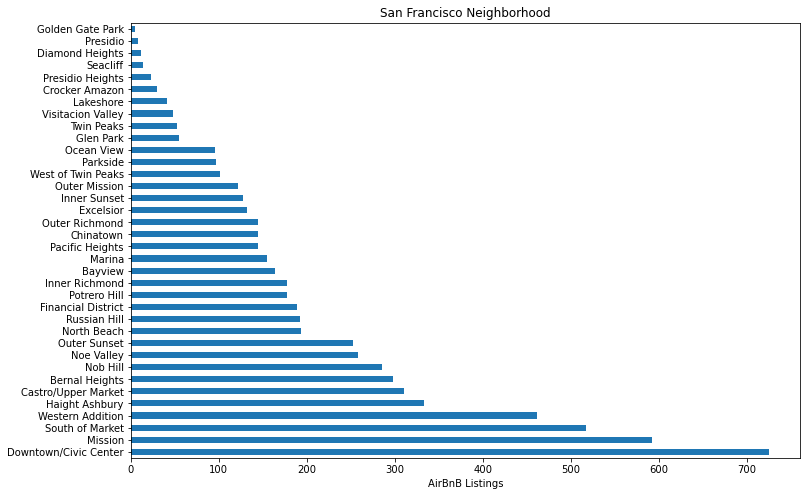

In [42]:
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
NPlot = filled_avg.neighbourhood_cleansed.value_counts().plot(kind='barh', figsize=(12, 8))
#Give the plot a helpful title of 'Neighborhood'
NPlot.set_title('San Francisco Neighborhood')
#Label the xaxis 'Listings'
NPlot.set_xlabel('AirBnB Listings')


### Neighborhoods sorted by average price

In [43]:
filled_avg['price'] = filled_avg['price'].str.replace('$','')
filled_avg['price'] = filled_avg['price'].str.replace(',','')
filled_avg['price'] = pd.to_numeric(filled_avg['price'])
#filled_avg['price_per_bed'] = filled_avg['price']/filled_avg['beds']
filled_avg['price_per_bedroom'] = filled_avg['price']/filled_avg['bedrooms']
filled_avg['price_per_person'] = filled_avg['price']/filled_avg['accommodates']

<ipython-input-43-1360c45cc21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_avg['price'] = filled_avg['price'].str.replace('$','')
<ipython-input-43-1360c45cc21a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_avg['price'] = filled_avg['price'].str.replace(',','')
<ipython-input-43-1360c45cc21a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

<ipython-input-44-17d687858146>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hood_price_means = filled_avg.groupby('neighbourhood_cleansed')['price','price_per_bedroom','price_per_person'].mean()


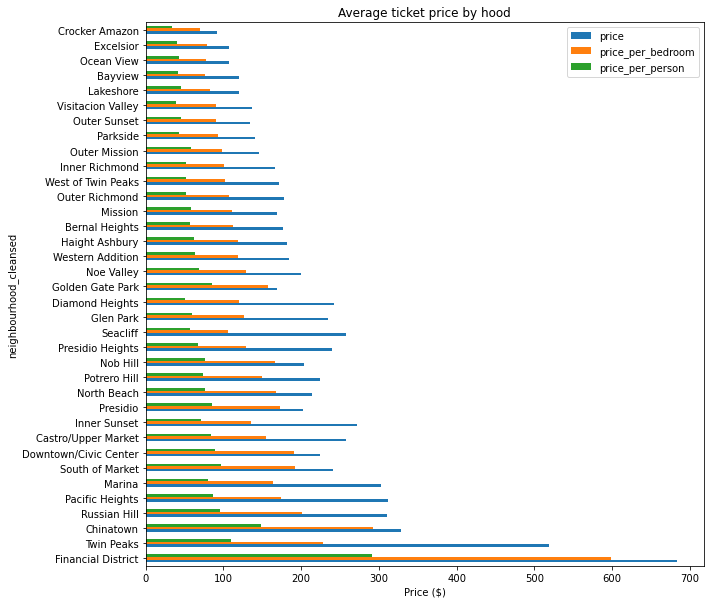

In [44]:
hood_price_means = filled_avg.groupby('neighbourhood_cleansed')['price','price_per_bedroom','price_per_person'].mean()

#hood_price_means = filled_avg.groupby('neighbourhood_cleansed')['price','price_per_bedroom'].mean()
#hood_price_means.sort_values()

(hood_price_means.reindex(index=hood_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by hood'))
plt.xlabel('Price ($)');


#### Distribution of price per bedroom and price by person  by neighborhood

In [45]:
room_prices = pd.melt(filled_avg[['neighbourhood_cleansed', 'price', 'price_per_person']], 
                        id_vars='neighbourhood_cleansed', 
                        var_name='price per', 
                        value_vars=['price_per_bedroom', 'price_per_person'], 
                        value_name='Prices')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['price_per_bedroom']"

In [ ]:
filled_avg.hist(column='price')

### Price by Type of property

In [ ]:
property_type_price_means = filled_avg.groupby('property_type')['price'].mean()
property_type_price_means.sort_values()

### Unique property types - looking for oddities
Is there anything that does not fit in the simplified types?

In [ ]:
filled_avg['property_type'].value_counts().head(60)

### Price by simplified type of property

In [ ]:
room_type_price_means = filled_avg.groupby('room_type')['price'].mean()
room_type_price_means.sort_values()
#room_type_price_means/listings_data.bedrooms

In [ ]:
colList = list(filled_avg.columns)
#print(colList)

In [ ]:
numCols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_per_bedroom', 'price_per_person']

In [ ]:
colList = list(filled_avg.columns)
NumericDF = filled_avg[numCols]

NumericDF.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

In [ ]:
NumericDF['price'].value_counts()

In [ ]:
NumericDF.hist(column='price')

## Saving Data

In [ ]:
filled_avg.shape

In [ ]:
# save the data to a new csv file
datapath = '../data'
save_file(filled_avg, 'AirBnB_listings_averaged_cleaned.csv', datapath)